In [13]:
#!pip3 install numpy=1.20.2
#!pip3 install pandas=1.2.4
#!pip3 install pillow=8.1.2
#!pip3 install scipy=1.6.3
#!pip3 install rdkit=2022.3.4
#!pip3 install scikit-learn=0.24.2
#!pip3 install matplotlib=3.4.1
#!pip3 install seaborn=0.11.1

In [12]:
!pip3 show rdkit

Name: rdkit
Version: 2022.3.4
Summary: A collection of chemoinformatics and machine-learning software written in C++ and Python
Home-page: https://github.com/kuelumbus/rdkit-pypi
Author: Christopher Kuenneth
Author-email: chris@kuenneth.dev
License: BSD-3-Clause
Location: /opt/conda/lib/python3.8/site-packages
Requires: Pillow, numpy
Required-by: 


In [89]:
import pandas as pd
import numpy as np
import scipy
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor, rdMolDescriptors
from rdkit.SimDivFilters import rdSimDivPickers
import time
rdDepictor.SetPreferCoordGen(True)
import rdkit
%matplotlib inline
%pylab inline
print(rdkit.__version__)

Populating the interactive namespace from numpy and matplotlib
2022.03.4


In [90]:
data_train_random_meta = pd.read_csv("work/training/dual-model/train-meta-random.csv", sep=",", encoding="utf-8")
data_test_random_meta = pd.read_csv("work/training/dual-model/test-meta-random.csv", sep=",", encoding="utf-8")
data_train_random = pd.read_csv("work/training/dual-model/train-random.csv", sep=",", encoding="utf-8")
data_test_random = pd.read_csv("work/training/dual-model/test-random.csv", sep=",", encoding="utf-8")
all_ligands = pd.read_csv("work/data/chembl_ligands_filtered_combined_tanimoto_smiles.tsv", sep="\t", encoding="utf-8")

In [91]:
all_ligands.head()

,pdb,ligand_file,chembl_id,tanimoto_index,smiles
0,4twp,4twp_ligand_similar_196,CHEMBL3920052,0.844156,N(C(=O)c1c(cccc1)Sc1cc2c(cc1)c(n[nH]2)/C=C/c1c...
1,4twp,4twp_ligand_similar_469,CHEMBL3967380,0.607143,c1cc(cc2c1c(n[nH]2)/C=C/c1ccccn1)Nc1ccccc1C(=O...
2,4twp,4twp_ligand_similar_139,CHEMBL3948865,0.866667,c1(NC(=O)c2c(cccc2)Sc2cc3c(cc2)c(n[nH]3)/C=C/c...
3,4twp,2v7a_ligand_similar_287,CHEMBL3662868,0.608696,COCCCN1C[C@H](C)N(C[C@H]1C)C(=O)N1Cc2c(NC(=O)c...
4,4twp,2v7a_ligand_similar_199,CHEMBL3662869,0.634538,COCCN1C[C@H](C)N(C[C@H]1C)C(=O)N1Cc2c(NC(=O)c3...


In [92]:
data_test_random_meta.shape

(1683, 4)

In [93]:
data_random_meta = pd.concat([data_train_random_meta,data_test_random_meta])
data_random_meta = data_random_meta.reset_index(drop=True)
data_random = pd.concat([data_train_random,data_test_random])
data_random = data_random.reset_index(drop=True)

In [94]:
print(data_random_meta.shape)
print(data_random.shape)

(8421, 4)
(8421, 126)


In [95]:
data_random.head()

,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,RuleOfFiveDescriptorV5,RotatableBondsCountDescriptor,HBondDonorCountDescriptor,HBondAcceptorCountDescriptor,...,StrandSS,OtherSS,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba
0,569.0146,0,0,1,0,0,0,12,3,9,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-9.3
1,608.7280,0,0,1,0,0,0,18,4,7,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-7.8
2,586.9836,0,0,1,0,0,0,10,2,11,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-9.0
3,269.0821,1,0,0,0,0,0,0,0,1,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-5.1
4,587.4635,0,0,1,0,0,0,10,5,8,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-9.8


In [96]:
data_random_meta.head()

,pdb,ligand_file,chembl_id,tanimoto_index
0,4crc,4crc_ligand_similar_77,CHEMBL3398642,0.627706
1,4crc,4cra_ligand_similar_145,CHEMBL3984836,0.606897
2,4crc,4crc_ligand_similar_37,CHEMBL4101257,0.687500
3,4crc,4cr9_ligand_similar_191,CHEMBL1882875,0.603774
4,4crc,4ty7_ligand_similar_44,CHEMBL3398638,0.683983


In [97]:
data_random = pd.concat([data_random_meta, data_random], axis=1, join="inner")

In [98]:
data_random.shape

(8421, 130)

In [99]:
data_random.head()

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,StrandSS,OtherSS,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba
0,4crc,4crc_ligand_similar_77,CHEMBL3398642,0.627706,569.0146,0,0,1,0,0,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-9.3
1,4crc,4cra_ligand_similar_145,CHEMBL3984836,0.606897,608.7280,0,0,1,0,0,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-7.8
2,4crc,4crc_ligand_similar_37,CHEMBL4101257,0.687500,586.9836,0,0,1,0,0,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-9.0
3,4crc,4cr9_ligand_similar_191,CHEMBL1882875,0.603774,269.0821,1,0,0,0,0,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-5.1
4,4crc,4ty7_ligand_similar_44,CHEMBL3398638,0.683983,587.4635,0,0,1,0,0,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0,2067.8781,1515,-9.8


In [100]:
ids = data_random["chembl_id"]
data_random[ids.isin(ids[ids.duplicated()])].sort_values("chembl_id")

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,StrandSS,OtherSS,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba
3505,4wiv,4ogj_ligand_similar_27,CHEMBL101473,0.616883,393.4829,1,0,0,0,0,...,0.0000,0.4882,1,0,0.5278,0.4722,1.1176,1588.9832,1095,-7.7
5096,3up2,3up2_ligand_similar_272,CHEMBL101473,0.607692,393.4829,1,0,0,0,0,...,0.1579,0.4549,0,1,0.5682,0.4318,1.3158,1564.6148,1293,-8.3
7339,4jia,4e6q_ligand_similar_150,CHEMBL102648,0.656250,420.5083,1,0,0,0,0,...,0.1733,0.3900,1,0,0.5476,0.4524,1.2105,1744.1005,1048,-8.0
2137,4e5w,4e5w_ligand_similar_119,CHEMBL102648,0.639706,420.5083,1,0,0,0,0,...,0.1951,0.3885,1,0,0.6792,0.3208,2.1176,3547.2605,1506,-7.1
1977,4e5w,4e5w_ligand_similar_44,CHEMBL1088346,0.692982,344.4536,1,0,0,0,0,...,0.1951,0.3885,1,0,0.6792,0.3208,2.1176,3547.2605,1506,-7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,4crc,4cr9_ligand_similar_42,CHEMBL528924,0.690909,235.2844,1,0,0,0,0,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0000,2067.8781,1515,-8.0
124,4crc,4cr9_ligand_similar_37,CHEMBL62083,0.697674,144.1736,1,0,0,0,0,...,0.3165,0.5316,0,1,0.6667,0.3333,2.0000,2067.8781,1515,-6.5
6527,3utu,1bcu_ligand_similar_99,CHEMBL62083,0.757576,144.1736,1,0,0,0,0,...,0.2945,0.5273,0,1,0.6140,0.3860,1.5909,2236.5199,1518,-7.9
5859,2weg,2weg_ligand_similar_8,CHEMBL6648,0.702703,207.2504,1,0,0,0,0,...,0.2868,0.5659,0,1,0.8810,0.1190,7.4000,558.1279,1037,-6.9


In [101]:
data_random = data_random.merge(all_ligands[["chembl_id", "smiles"]], on="chembl_id", how="left")

In [102]:
data_random["ID"] = data_random[["pdb", "ligand_file", "chembl_id"]].apply("-".join, axis=1)

In [103]:
data_random.head()

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba,smiles,ID
0,4crc,4crc_ligand_similar_77,CHEMBL3398642,0.627706,569.0146,0,0,1,0,0,...,0,1,0.6667,0.3333,2.0,2067.8781,1515,-9.3,c1c(cccc1)C[C@H](NC(=O)/C=C/c1c(ccc(c1)Cl)n1nn...,4crc-4crc_ligand_similar_77-CHEMBL3398642
1,4crc,4cra_ligand_similar_145,CHEMBL3984836,0.606897,608.7280,0,0,1,0,0,...,0,1,0.6667,0.3333,2.0,2067.8781,1515,-7.8,CCOc1ccc(C[C@@H](NC(=O)c2ccc(OC)cc2)C(=O)N[C@@...,4crc-4cra_ligand_similar_145-CHEMBL3984836
2,4crc,4cra_ligand_similar_145,CHEMBL3984836,0.606897,608.7280,0,0,1,0,0,...,0,1,0.6667,0.3333,2.0,2067.8781,1515,-7.8,CCOc1ccc(C[C@@H](NC(=O)c2ccc(OC)cc2)C(=O)N[C@@...,4crc-4cra_ligand_similar_145-CHEMBL3984836
3,4crc,4crc_ligand_similar_37,CHEMBL4101257,0.687500,586.9836,0,0,1,0,0,...,0,1,0.6667,0.3333,2.0,2067.8781,1515,-9.0,c1cc(cc(c1n1cnnn1)/C=C/C(=O)N1C(C(=O)Nc2ccc(cc...,4crc-4crc_ligand_similar_37-CHEMBL4101257
4,4crc,4cr9_ligand_similar_191,CHEMBL1882875,0.603774,269.0821,1,0,0,0,0,...,0,1,0.6667,0.3333,2.0,2067.8781,1515,-5.1,Ic1cc2c(nccc2C)cc1,4crc-4cr9_ligand_similar_191-CHEMBL1882875


In [104]:
ids = data_random["chembl_id"]
data_random[ids.isin(ids[ids.duplicated()])].sort_values("chembl_id")

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba,smiles,ID
5476,3up2,3up2_ligand_similar_272,CHEMBL101473,0.607692,393.4829,1,0,0,0,0,...,0,1,0.5682,0.4318,1.3158,1564.6148,1293,-8.3,n1c(c(cnc1Nc1ccc(OCC(CN(C)C)O)cc1)C)Nc1ccccc1,3up2-3up2_ligand_similar_272-CHEMBL101473
3883,4wiv,4ogj_ligand_similar_27,CHEMBL101473,0.616883,393.4829,1,0,0,0,0,...,1,0,0.5278,0.4722,1.1176,1588.9832,1095,-7.7,n1c(c(cnc1Nc1ccc(OCC(CN(C)C)O)cc1)C)Nc1ccccc1,4wiv-4ogj_ligand_similar_27-CHEMBL101473
3882,4wiv,4ogj_ligand_similar_27,CHEMBL101473,0.616883,393.4829,1,0,0,0,0,...,1,0,0.5278,0.4722,1.1176,1588.9832,1095,-7.7,n1c(c(cnc1Nc1ccc(OCC(CN(C)C)O)cc1)C)Nc1ccccc1,4wiv-4ogj_ligand_similar_27-CHEMBL101473
5475,3up2,3up2_ligand_similar_272,CHEMBL101473,0.607692,393.4829,1,0,0,0,0,...,0,1,0.5682,0.4318,1.3158,1564.6148,1293,-8.3,n1c(c(cnc1Nc1ccc(OCC(CN(C)C)O)cc1)C)Nc1ccccc1,3up2-3up2_ligand_similar_272-CHEMBL101473
2356,4e5w,4e5w_ligand_similar_119,CHEMBL102648,0.639706,420.5083,1,0,0,0,0,...,1,0,0.6792,0.3208,2.1176,3547.2605,1506,-7.1,n1(c(nc2c1ccnc2)C)CC1CCN(C(=O)CN(C(=O)c2ccc(N)...,4e5w-4e5w_ligand_similar_119-CHEMBL102648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4crc,4cra_ligand_similar_38,CHEMBL68225,0.635762,508.6119,0,1,0,0,0,...,0,1,0.6667,0.3333,2.0000,2067.8781,1515,-9.2,c1(C(=O)N2C(C(=O)N[C@@H](C(=O)N(Cc3ccccc3)C)Cc...,4crc-4cra_ligand_similar_38-CHEMBL68225
930,2hb1,1bzc_ligand_similar_177,CHEMBL96012,0.611111,248.3213,1,0,0,0,0,...,0,1,0.6667,0.3333,2.0000,1403.5820,1039,-6.3,C(=O)(NCc1ccccc1)C(NC(=O)C)CCC,2hb1-1bzc_ligand_similar_177-CHEMBL96012
929,2hb1,1bzc_ligand_similar_177,CHEMBL96012,0.611111,248.3213,1,0,0,0,0,...,0,1,0.6667,0.3333,2.0000,1403.5820,1039,-6.3,C(=O)(NCc1ccccc1)C(NC(=O)C)CCC,2hb1-1bzc_ligand_similar_177-CHEMBL96012
191,4crc,4cr9_ligand_similar_185,CHEMBL99408,0.604651,144.1736,1,0,0,0,0,...,0,1,0.6667,0.3333,2.0000,2067.8781,1515,-5.9,Nc1ccc2ncccc2c1,4crc-4cr9_ligand_similar_185-CHEMBL99408


In [105]:
data_random = data_random.groupby('ID').first()

In [107]:
data_random.shape

(8421, 131)

In [108]:
ids = data_random["chembl_id"]
data_random[ids.isin(ids[ids.duplicated()])].sort_values("chembl_id")

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,OtherSS,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba,smiles
ID,,,,,,,,,,,,,,,,,,,,,
4wiv-4ogj_ligand_similar_27-CHEMBL101473,4wiv,4ogj_ligand_similar_27,CHEMBL101473,0.616883,393.4829,1,0,0,0,0,...,0.4882,1,0,0.5278,0.4722,1.1176,1588.9832,1095,-7.7,n1c(c(cnc1Nc1ccc(OCC(CN(C)C)O)cc1)C)Nc1ccccc1
3up2-3up2_ligand_similar_272-CHEMBL101473,3up2,3up2_ligand_similar_272,CHEMBL101473,0.607692,393.4829,1,0,0,0,0,...,0.4549,0,1,0.5682,0.4318,1.3158,1564.6148,1293,-8.3,n1c(c(cnc1Nc1ccc(OCC(CN(C)C)O)cc1)C)Nc1ccccc1
4e5w-4e5w_ligand_similar_119-CHEMBL102648,4e5w,4e5w_ligand_similar_119,CHEMBL102648,0.639706,420.5083,1,0,0,0,0,...,0.3885,1,0,0.6792,0.3208,2.1176,3547.2605,1506,-7.1,n1(c(nc2c1ccnc2)C)CC1CCN(C(=O)CN(C(=O)c2ccc(N)...
4jia-4e6q_ligand_similar_150-CHEMBL102648,4jia,4e6q_ligand_similar_150,CHEMBL102648,0.656250,420.5083,1,0,0,0,0,...,0.3900,1,0,0.5476,0.4524,1.2105,1744.1005,1048,-8.0,n1(c(nc2c1ccnc2)C)CC1CCN(C(=O)CN(C(=O)c2ccc(N)...
4e5w-4e5w_ligand_similar_44-CHEMBL1088346,4e5w,4e5w_ligand_similar_44,CHEMBL1088346,0.692982,344.4536,1,0,0,0,0,...,0.3885,1,0,0.6792,0.3208,2.1176,3547.2605,1506,-7.4,n1c2c(nc3ccccc13)c1ccccc1n2CCN1C(CCCC1)C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3udh-3rsx_ligand_similar_32-CHEMBL528924,3udh,3rsx_ligand_similar_32,CHEMBL528924,0.616438,235.2844,1,0,0,0,0,...,0.4619,0,1,0.6341,0.3659,1.7333,1291.3232,414,-8.6,Nc1cccc(c1)c1ccc2ccnc(N)c2c1
4crc-4cr9_ligand_similar_37-CHEMBL62083,4crc,4cr9_ligand_similar_37,CHEMBL62083,0.697674,144.1736,1,0,0,0,0,...,0.5316,0,1,0.6667,0.3333,2.0000,2067.8781,1515,-6.5,Nc1nccc2ccccc12
3utu-1bcu_ligand_similar_99-CHEMBL62083,3utu,1bcu_ligand_similar_99,CHEMBL62083,0.757576,144.1736,1,0,0,0,0,...,0.5273,0,1,0.6140,0.3860,1.5909,2236.5199,1518,-7.9,Nc1nccc2ccccc12


In [110]:
data_random.to_csv("work/training/dual-model/data_random_with_smiles.tsv", sep="\t", index=False, encoding="utf-8")

In [111]:
data_random = pd.read_csv("work/training/dual-model/data_random_with_smiles.tsv", sep="\t", encoding="utf-8")

In [112]:
data_random.shape

(8421, 131)

In [113]:
data_random.head()

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,OtherSS,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba,smiles
0,1owh,1c5z_ligand_similar_1,CHEMBL265435,0.720000,121.1368,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-5.2,c1cccc(c1)/C=N\\O
1,1owh,1c5z_ligand_similar_12,CHEMBL3188668,0.652174,208.2557,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-6.1,OCc1c2c(cc3c1cccc3)cccc2
2,1owh,1c5z_ligand_similar_18,CHEMBL3230486,0.650000,256.3418,0,1,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-6.3,c1ccc2c(c1)c1c(c(c2)C)c2c(cc1C)cccc2
3,1owh,1c5z_ligand_similar_24,CHEMBL286317,0.650000,306.4006,0,1,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-7.6,c12c(c(c3c(c1C)c1c(cc3)cccc1)C)ccc1c2cccc1
4,1owh,1c5z_ligand_similar_5,CHEMBL20936,0.692308,120.1521,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-4.7,N=C(N)c1ccccc1


In [115]:
data_random.iloc[[8050]]

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,OtherSS,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba,smiles
8050,5a7b,5aba_ligand_similar_33,CHEMBL3481836,0.648936,338.8728,1,0,0,0,0,...,0.5765,0,1,0.3,0.7,0.4286,1772.1041,644,-6.1,CC1(C)CN(CCC(=O)NCc2cccc(Cl)c2)CC[C@]1(C)O


In [118]:
ms = [x for x in Chem.SmilesMolSupplier('work/training/dual-model/data_random_with_smiles.tsv', delimiter="\t", smilesColumn=130, nameColumn=2)]
len(ms)

8421

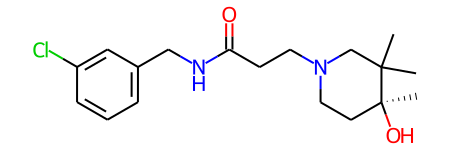

In [119]:
ms[8050]


In [120]:
fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m,2,2048) for m in ms]

In [121]:
lp = rdSimDivPickers.LeaderPicker()

In [122]:
thresh = 0.59 # <- minimum distance between cluster centroids
picks = lp.LazyBitVectorPick(fps,len(fps),thresh,int(len(fps)*0.2))
print(len(picks))

1684


In [123]:
from rdkit import DataStructs
pickfps = [fps[x] for x in picks]
nearest = []
simhist = []
for i,fpi in enumerate(pickfps):
    tfps = pickfps[:]
    del tfps[i]
    sims = DataStructs.BulkTanimotoSimilarity(fpi,tfps)
    nearest.append(max(sims))
    simhist.extend(sims)
sorted(nearest,reverse=True)[:10]

[0.41,
 0.41,
 0.4098360655737705,
 0.4098360655737705,
 0.4098360655737705,
 0.4098360655737705,
 0.4098360655737705,
 0.4098360655737705,
 0.4098360655737705,
 0.4098360655737705]

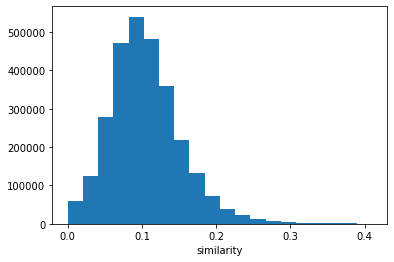

In [124]:
hist(simhist,bins=20);
xlabel('similarity');

In [127]:
test_ligand_diversity = data_random.iloc[picks]

In [128]:
test_ligand_diversity.shape

(1684, 131)

In [133]:
test_ligand_diversity.head()

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,OtherSS,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba,smiles
0,1owh,1c5z_ligand_similar_1,CHEMBL265435,0.720000,121.1368,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-5.2,c1cccc(c1)/C=N\\O
1,1owh,1c5z_ligand_similar_12,CHEMBL3188668,0.652174,208.2557,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-6.1,OCc1c2c(cc3c1cccc3)cccc2
2,1owh,1c5z_ligand_similar_18,CHEMBL3230486,0.650000,256.3418,0,1,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-6.3,c1ccc2c(c1)c1c(c(c2)C)c2c(cc1C)cccc2
4,1owh,1c5z_ligand_similar_5,CHEMBL20936,0.692308,120.1521,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-4.7,N=C(N)c1ccccc1
5,1owh,1c5z_ligand_similar_6,CHEMBL31561,0.684211,106.1653,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-4.5,c1(ccc(cc1)C)C


In [130]:
train_ligand_diversity = data_random.drop(picks)

In [132]:
train_ligand_diversity.shape

(6737, 131)

In [134]:
train_ligand_diversity.head()

,pdb,ligand_file,chembl_id,tanimoto_index,WeightDescriptor,RuleOfFiveDescriptorV0,RuleOfFiveDescriptorV1,RuleOfFiveDescriptorV2,RuleOfFiveDescriptorV3,RuleOfFiveDescriptorV4,...,OtherSS,DominantSSHelix,DominantSSOther,BuriedASA,ExposedASA,RatioASA,PocketASA,volume,ba,smiles
3,1owh,1c5z_ligand_similar_24,CHEMBL286317,0.650000,306.4006,0,1,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-7.6,c12c(c(c3c(c1C)c1c(cc3)cccc1)C)ccc1c2cccc1
11,1owh,1owh_ligand_similar_1031,CHEMBL1580702,0.626667,348.3528,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-8.0,O=C(Nc1cc(O)ccc1)c1cc(C(=O)Nc2cc(O)ccc2)ccc1
15,1owh,1owh_ligand_similar_1040,CHEMBL1213773,0.626667,241.2857,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-6.4,C(=O)(Nc1ccc(cc1)OC)c1cc(ccc1)C
17,1owh,1owh_ligand_similar_1048,CHEMBL1548673,0.626506,324.3313,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-6.9,O=C(Nc1c(C(=O)O)cccc1)c1ccc(NC(=O)C2CC2)cc1
19,1owh,1owh_ligand_similar_106,CHEMBL1724652,0.680556,292.2894,1,0,0,0,0,...,0.5265,0,1,0.6809,0.3191,2.1333,1350.1025,1066,-7.2,O=C(Nc1c2c(ccc1)cccc2)c1ccc([N+](=O)[O-])cc1


In [140]:
train_ligand_diversity_meta = train_ligand_diversity[["pdb", "ligand_file", "chembl_id", "tanimoto_index", "smiles"]]
train_ligand_diversity = train_ligand_diversity.drop(["pdb", "ligand_file", "chembl_id", "tanimoto_index", "smiles"], axis=1)

In [141]:
print(train_ligand_diversity_meta.shape)
print(train_ligand_diversity.shape)

(6737, 5)
(6737, 126)


In [148]:
train_ligand_diversity_meta.to_csv("work/training/dual-model/train-meta-ligand-diversity.csv", sep=",", index=False, encoding="utf-8")
train_ligand_diversity.to_csv("work/training/dual-model/train-ligand-diversity.csv", sep=",", index=False, encoding="utf-8")

In [143]:
test_ligand_diversity_meta = test_ligand_diversity[["pdb", "ligand_file", "chembl_id", "tanimoto_index", "smiles"]]
test_ligand_diversity = test_ligand_diversity.drop(["pdb", "ligand_file", "chembl_id", "tanimoto_index", "smiles"], axis=1)

In [144]:
print(test_ligand_diversity_meta.shape)
print(test_ligand_diversity.shape)

(1684, 5)
(1684, 126)


In [149]:
test_ligand_diversity_meta.to_csv("work/training/dual-model/test-meta-ligand-diversity.csv", sep=",", index=False, encoding="utf-8")
test_ligand_diversity.to_csv("work/training/dual-model/test-ligand-diversity.csv", sep=",", index=False, encoding="utf-8")